In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)
from sklearn.dummy import DummyRegressor, DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier

from sklearn.naive_bayes import MultinomialNB

import warnings

In [2]:
warnings.filterwarnings("ignore")

Reading in pixelated csv from image data

In [3]:
df = pd.read_csv('project_4/data/fold_0_all_hem_pixelated.csv')

## EDA

In [4]:
df.head()

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


Dropping Unnamed: 0 column

In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Columns: 785 entries, pixel1 to label
dtypes: float64(784), object(1)
memory usage: 21.1+ MB


In [8]:
df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
label       0
Length: 785, dtype: int64

Baseline Value if all selections are positive

In [9]:
df['label'].value_counts(normalize=True)

positive    0.679716
negative    0.320284
Name: label, dtype: float64

In [10]:
df.shape

(3525, 785)

## Modeling

In [11]:
X= df.drop(columns = ['label'])
y= df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42,
                                                    stratify = y)

Naive Bayes

In [12]:
nb_pipe = Pipeline([('nb', MultinomialNB())])

In [13]:
nb_pipe_params = {
    'nb__alpha': [1, 1.5, 2]
}

In [14]:
nb_gs = GridSearchCV(nb_pipe, param_grid = nb_pipe_params, n_jobs=-1)

In [15]:
nb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('nb', MultinomialNB())]), n_jobs=-1,
             param_grid={'nb__alpha': [1, 1.5, 2]})

In [16]:
nb_gs.score(X_train, y_train)

0.720771850170261

In [17]:
nb_gs.score(X_test, y_test)

0.7154195011337868

In [18]:
y_train.value_counts(normalize=True)

positive    0.679531
negative    0.320469
Name: label, dtype: float64

In [19]:
nb_gs.best_params_

{'nb__alpha': 1}

In [20]:
cross_val_score(nb_gs, X_train, y_train)

array([0.75803403, 0.6805293 , 0.73724008, 0.69128788, 0.73295455])

kNN Classifer - TOP PERFORMER

In [21]:
knn_pipe = Pipeline([
    ('ss', StandardScaler(with_mean=False)),
    ('knn', KNeighborsClassifier())
])

In [22]:
knn_pipe_params = {
    'knn__n_neighbors':[8,9,10]
}

In [23]:
knn_gs = GridSearchCV(knn_pipe, param_grid = knn_pipe_params, n_jobs=-1)

In [24]:
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler(with_mean=False)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [8, 9, 10]})

In [25]:
knn_gs.score(X_test, y_test)

0.8458049886621315

In [26]:
knn_gs.score(X_train, y_train)

0.8603859250851306

In [27]:
knn_gs.best_params_

{'knn__n_neighbors': 9}

Random Forrest - Good test score but very overfit

In [28]:
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

In [29]:

rf_pipe_params = {
    'rf__n_estimators': [150,200,250],
    'rf__max_depth': [9,10,11,12],
    'rf__min_samples_leaf': [1, 2],
    'rf__random_state': [42]
}

In [30]:
rf_gs = GridSearchCV(rf_pipe, param_grid = rf_pipe_params, n_jobs=-1)

In [31]:
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [9, 10, 11, 12],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__n_estimators': [150, 200, 250],
                         'rf__random_state': [42]})

In [32]:
rf_gs.score(X_test, y_test)

0.8458049886621315

In [33]:
rf_gs.score(X_train, y_train)

0.9508134695421869

In [34]:
rf_gs.best_params_

{'rf__max_depth': 12,
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 200,
 'rf__random_state': 42}

Logistic Regression

In [35]:
lr_pipe = Pipeline([
    ('ss',StandardScaler(with_mean=False)),
    ('lr', LogisticRegression(penalty ='l2'))
])

In [36]:
lr_pipe_params = {
    'lr__C':[.1, .2, .3],
}

In [37]:
lr_gs = GridSearchCV(lr_pipe, param_grid = lr_pipe_params, n_jobs=-1)

In [38]:
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler(with_mean=False)),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1, param_grid={'lr__C': [0.1, 0.2, 0.3]})

In [39]:
lr_gs.score(X_test, y_test)

0.8049886621315193

In [40]:
lr_gs.score(X_train, y_train)

0.8426031025349981

In [41]:
lr_gs.best_params_

{'lr__C': 0.1}

ADABoost - 1% better with test score but even more overfit

In [42]:
boost_pipe = Pipeline([
    ('boost', AdaBoostClassifier())
])

In [43]:
 
boost_pipe_params = {
    'boost__n_estimators': [40,50,60,70],
    'boost__base_estimator':[RandomForestClassifier(max_depth=8, min_samples_leaf=1, n_estimators=200)],
}

In [44]:
boost_gs = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)

In [45]:
boost_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('boost', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'boost__base_estimator': [RandomForestClassifier(max_depth=8,
                                                                          n_estimators=200)],
                         'boost__n_estimators': [40, 50, 60, 70]})

In [46]:
boost_gs.score(X_test, y_test)

0.8537414965986394

In [47]:
boost_gs.score(X_train, y_train)

0.9807037457434733

In [48]:
boost_gs.best_params_

{'boost__base_estimator': RandomForestClassifier(max_depth=8, n_estimators=200),
 'boost__n_estimators': 50}

In [49]:
level1_estimators = [
    ('nb', nb_gs.best_estimator_),
    ('lr', lr_gs.best_estimator_),
    ('knn', knn_gs.best_estimator_)
]

stacked_model = StackingClassifier(estimators=level1_estimators,
                                 final_estimator = LogisticRegression())

In [50]:
stacked_model.fit(X_train, y_train)

StackingClassifier(estimators=[('nb',
                                Pipeline(steps=[('nb',
                                                 MultinomialNB(alpha=1))])),
                               ('lr',
                                Pipeline(steps=[('ss',
                                                 StandardScaler(with_mean=False)),
                                                ('lr',
                                                 LogisticRegression(C=0.1))])),
                               ('knn',
                                Pipeline(steps=[('ss',
                                                 StandardScaler(with_mean=False)),
                                                ('knn',
                                                 KNeighborsClassifier(n_neighbors=9))]))],
                   final_estimator=LogisticRegression())

In [51]:
stacked_model.score(X_test, y_test)

0.8424036281179138

In [52]:

stacked_model.score(X_train, y_train)

0.8611426409383277

In [53]:
cross_val_score(stacked_model, X_train, y_train).mean()

0.8418392335452827

## Score Analysis

 - KNN was the highest performing model.

In [54]:
knn_gs.score(X_test, y_test)

0.8458049886621315

In [55]:
knn_gs.score(X_train, y_train)

0.8603859250851306

In [56]:
preds = knn_gs.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, preds, labels= knn_gs.classes_)

In [89]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

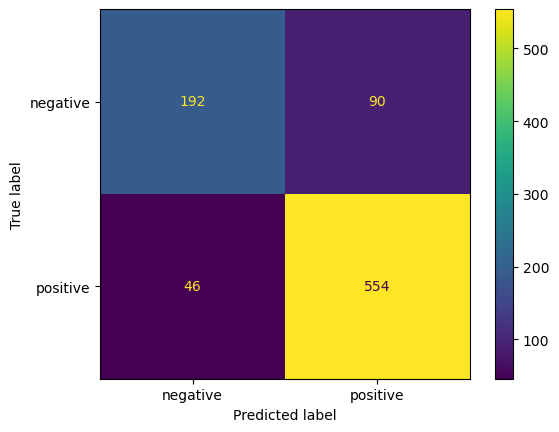

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=knn_gs.classes_,
                             );

disp.plot();

plt.savefig('./images/confusion_matrix.png')

In [82]:
print('Model accuracy is:', accuracy_score(y_test, preds))
print('Model precision is:', precision_score(y_test, preds, pos_label='positive'))
print('Model recall is:', recall_score(y_test, preds, pos_label='positive'))
print('Model F1 is:', f1_score(y_test, preds, pos_label='positive'))

Model accuracy is: 0.8458049886621315
Model precision is: 0.860248447204969
Model recall is: 0.9233333333333333
Model F1 is: 0.8906752411575563


In [88]:
print('Model specificity is:', tn / (tn+fp))

Model specificity is: 0.6808510638297872


In [124]:
y_test.value_counts()

positive    600
negative    282
Name: label, dtype: int64